In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

In [29]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\Machine Learning\udemy st ML\1. ST Academy - Crash course and Regression files\House_price.csv',header = 0)

In [41]:
x_train = np.array(data.room_num.values)
x = (x_train/np.max(x_train))
y_train = np.array(data.price.values)
y = (y_train / np.max(y_train))

In [42]:
# check the input
print('type of x_train is:',type(x_train))
print('first five elements of x_train: \n', x_train[:5])

type of x_train is: <class 'numpy.ndarray'>
first five elements of x_train: 
 [6.575 6.421 7.185 6.998 7.147]


In [43]:
#check the output
print('type of y_train is:' ,type(y_train))
print('first five elements are:\n',y_train[:5])

type of y_train is: <class 'numpy.ndarray'>
first five elements are:
 [24.  21.6 34.7 33.4 36.2]


In [44]:
#shape 
print('shape of x_train is:',x_train.shape)
print('shape of y_train is:',y_train.shape)
print('number of training data set,m:',x_train.shape[0])


shape of x_train is: (506,)
shape of y_train is: (506,)
number of training data set,m: 506


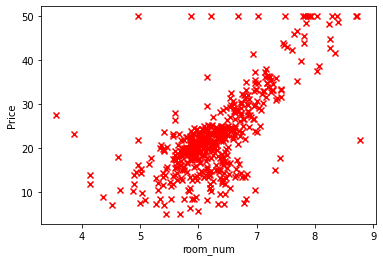

In [45]:
#visualize the data
plt.scatter(x_train,y_train,marker='x',c='r')
plt.xlabel('room_num')
plt.ylabel('Price')
#plt.title('profits vs population per city ')
plt.show()

In [46]:
def compute_cost(x,y,w,b):
    m =x.shape[0]
    total_cost = 0
    
    #calculate total cost
    f = np.dot(w,x)+b
    total_cost = np.sum((f-y)**2)
    total_cost /= 2*m
    
    
    return total_cost

In [47]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dw = 0
    db = 0
    
    f = np.dot(w,x)+b
    dw = np.sum((f-y)*x)
    db = np.sum(f-y)
    
    dw /= m
    db /= m
    
    return dw,db

In [48]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iter):
    m = len(x)
    j_history = []
    w_history = []
    
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iter):
        dw, db = gradient_function(x,y,w,b)
        
        w = w - alpha*dw
        b = b - alpha*db
        
        if i < 10000:
            cost = cost_function(x,y,w,b)
            j_history.append(cost)
        
        if i% math.ceil(num_iter/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}   ")
        
    return w, b, j_history, w_history
    

In [82]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 15000
alpha = 0.03

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.11   
Iteration 1500: Cost     0.01   
Iteration 3000: Cost     0.01   
Iteration 4500: Cost     0.01   
Iteration 6000: Cost     0.01   
Iteration 7500: Cost     0.01   
Iteration 9000: Cost     0.01   
Iteration 10500: Cost     0.01   
Iteration 12000: Cost     0.01   
Iteration 13500: Cost     0.01   
w,b found by gradient descent: 1.3910073225952508 -0.5444641677835976


In [83]:
prediction = np.dot(w,x) + b

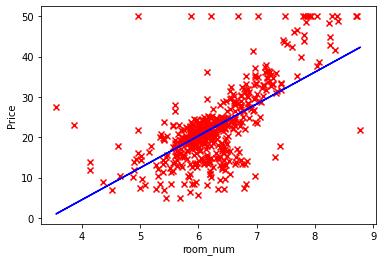

In [84]:
plt.plot(x*np.max(x_train),prediction*np.max(y_train),c='b')
plt.scatter(x_train,y_train,marker='x',c='r')
plt.xlabel('room_num')
plt.ylabel('Price')
#plt.title('profits vs population per city ')
plt.show()